In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [3]:
print(customers_df)
print(products_df)
print(transactions_df)

    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]
   ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography        Books   44

In [4]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [5]:
# Merge datasets
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='inner')
merged_df = merged_df.merge(products_df, on='ProductID', how='inner')
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor,304.94
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing,18.82


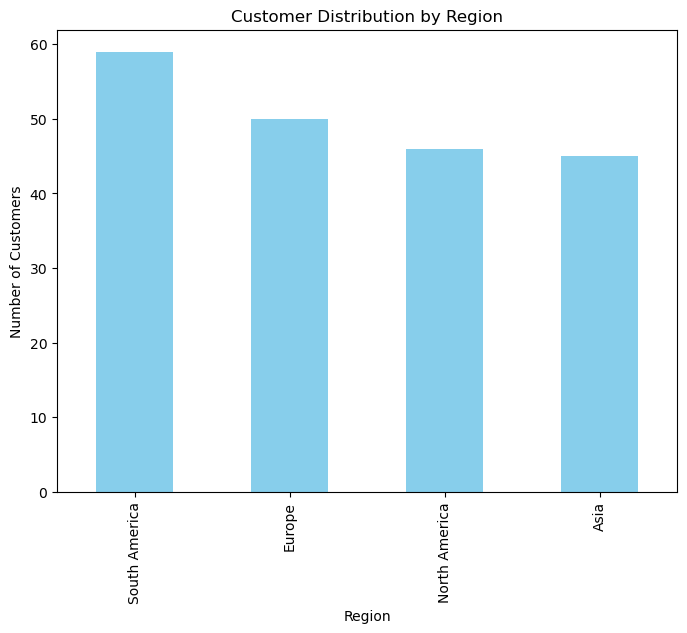

In [6]:
# =========================
# Exploratory Data Analysis
# =========================

# 1. Customer Analysis
# Distribution of customers by region
customer_region_dist = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 6))
customer_region_dist.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

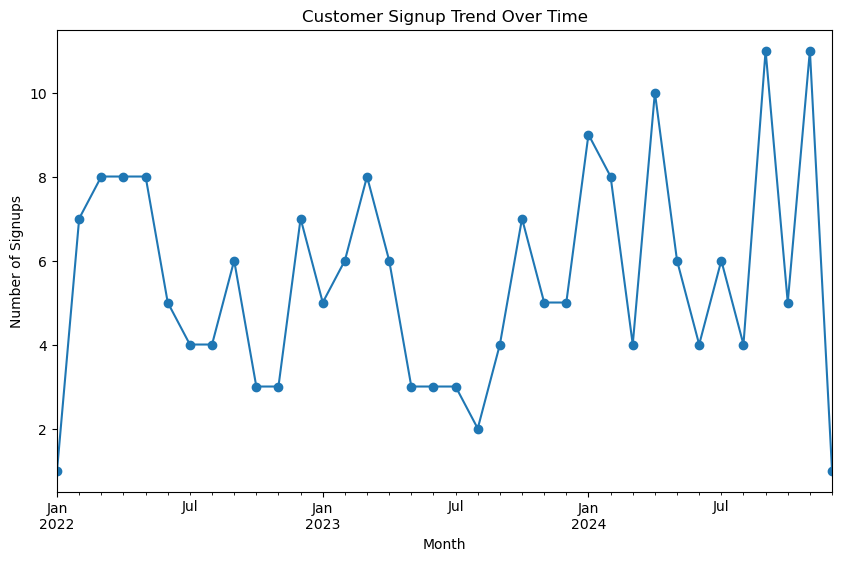

In [7]:
# Signup trend over time
signup_trend = customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='line', marker='o')
plt.title('Customer Signup Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()

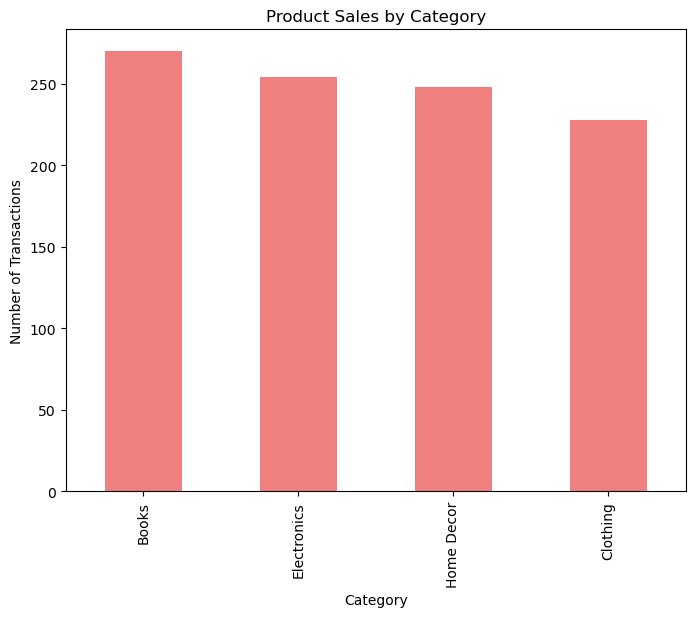

In [8]:
# 2. Product Analysis
# Most popular product categories
category_sales = merged_df['Category'].value_counts()
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='lightcoral')
plt.title('Product Sales by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()

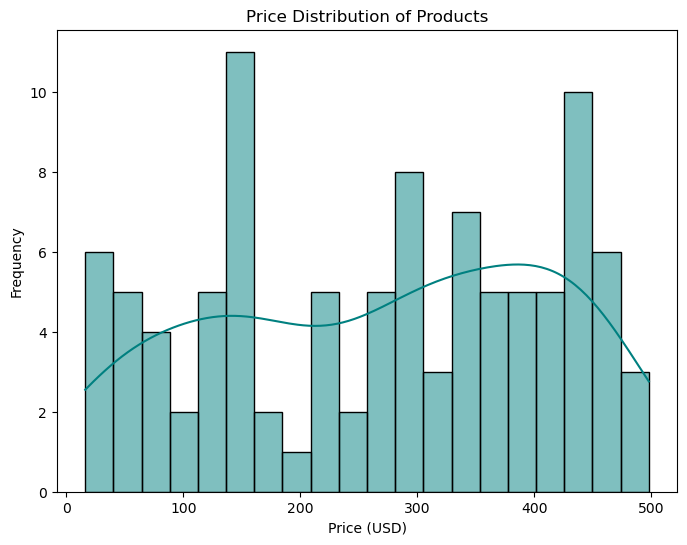

In [9]:
# Price distribution
plt.figure(figsize=(8, 6))
sns.histplot(products_df['Price'], bins=20, kde=True, color='teal')
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

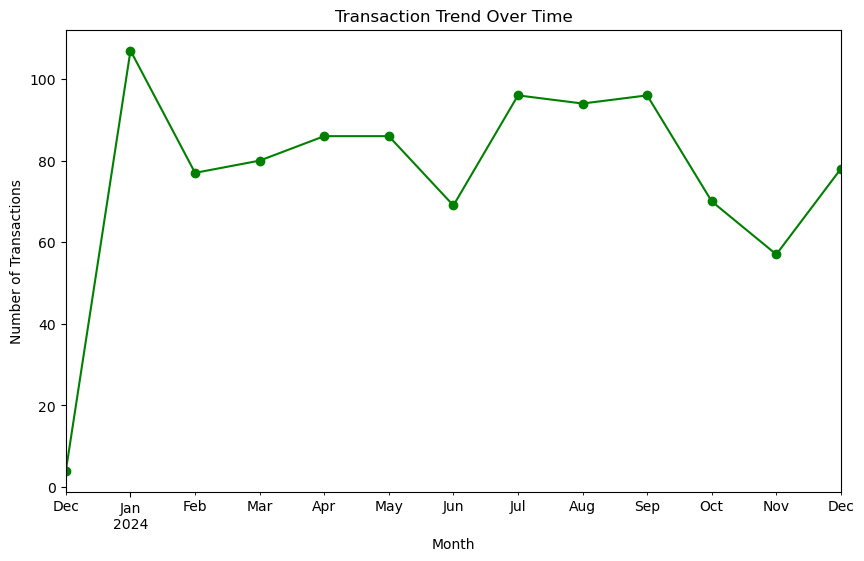

In [10]:
# 3. Transaction Analysis
# Transaction trends over time
transaction_trend = merged_df['TransactionDate'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 6))
transaction_trend.plot(kind='line', marker='o', color='green')
plt.title('Transaction Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

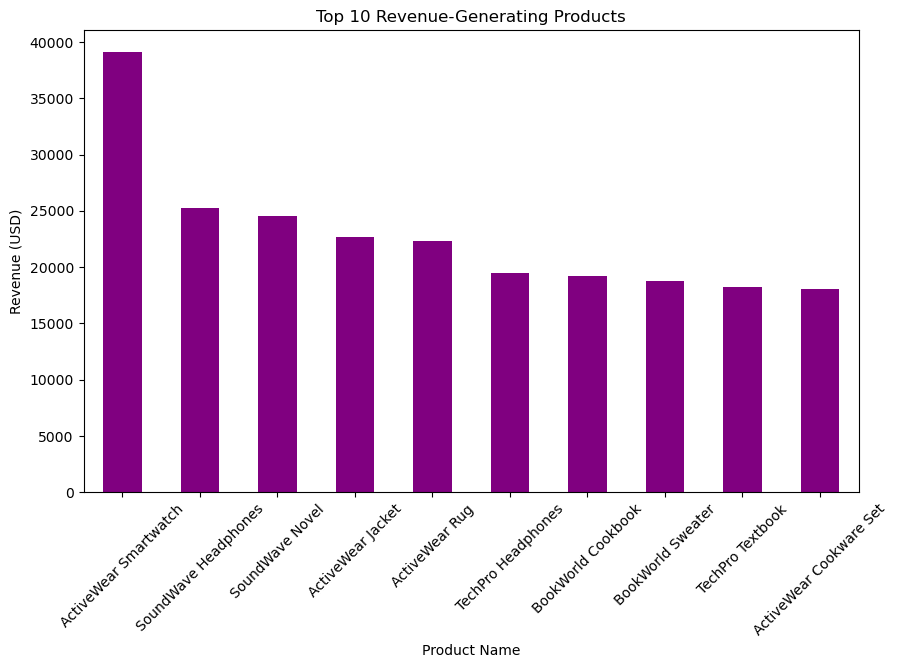

In [11]:
# Revenue contribution by product
merged_df['Revenue'] = merged_df['TotalValue']
product_revenue = merged_df.groupby('ProductName')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='purple')
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Product Name')
plt.ylabel('Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

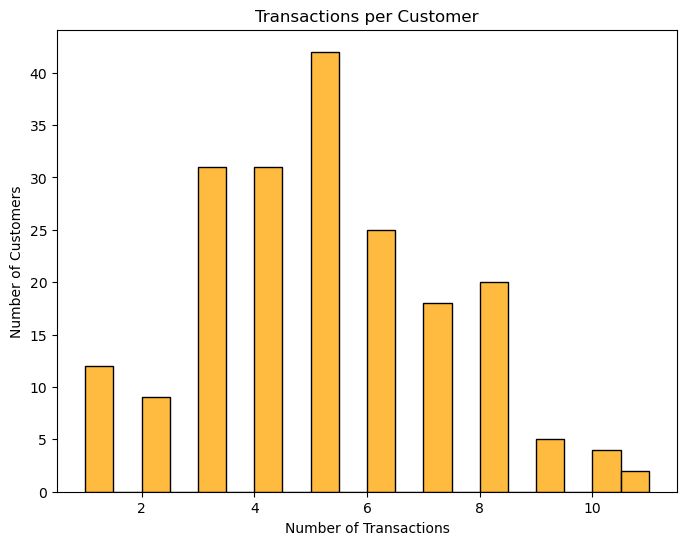

In [12]:
# 4. Customer Purchasing Behavior
# Transactions per customer
transactions_per_customer = merged_df['CustomerID'].value_counts()
plt.figure(figsize=(8, 6))
sns.histplot(transactions_per_customer, bins=20, kde=False, color='orange')
plt.title('Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()

In [19]:
# Total transactions and revenue
total_transactions = transactions_df['TransactionID'].nunique()
total_revenue = merged_df['TotalValue'].sum()
print(f"Total Transactions: {total_transactions}")
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Transactions: 1000
Total Revenue: $689,995.56


In [13]:
# =============================
# Deriving Business Insights
# =============================

print("\nBusiness Insights:")

# 1. Regional performance
region_revenue = merged_df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
print("1. Regional Revenue:")
print(region_revenue)


Business Insights:
1. Regional Revenue:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: Revenue, dtype: float64


In [14]:
# 2. Popular product categories
popular_categories = merged_df['Category'].value_counts().head(5)
print("\n2. Top 5 Popular Product Categories:")
print(popular_categories)


2. Top 5 Popular Product Categories:
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: Category, dtype: int64


In [15]:
# 3. Seasonal trends
seasonal_trends = transaction_trend
print("\n3. Seasonal Trends in Transactions:")
print(seasonal_trends)


3. Seasonal Trends in Transactions:
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: TransactionDate, dtype: int64


In [16]:
# 4. Customer segmentation (spending habits)
average_spending = merged_df.groupby('CustomerID')['Revenue'].mean().describe()
print("\n4. Customer Spending Analysis:")
print(average_spending)


4. Customer Spending Analysis:
count     199.000000
mean      687.580182
std       237.936649
min        82.360000
25%       542.941667
50%       677.207500
75%       828.624167
max      1323.133333
Name: Revenue, dtype: float64
